## Dependencias

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Conjunto de datos y preproceso

In [330]:

db = pd.read_csv('fruits.csv', index_col=0)
db.head()

,weight,length,width,regularity,cleft
0,1.205,4.603915,2.847,5.691634,Small
1,1.726,5.978000,3.594,4.539000,Large
2,1.126,4.516534,2.710,5.965993,Average
3,1.755,5.791000,3.690,5.366000,Large
4,1.238,4.666888,2.989,6.153947,Small


Podemos observar que nuestros datos incluyen información sobre 180 frutas y 5 variables con información sobre cada una de las frutas (peso, longitud, ancho, simetría y el tamaño de una grieta presente en la fruta). Además, existen algunos datos nulos y las columnas son de distinto tipo (weight, length, width y regularity son float, mientras que cleft es string). El enunciado ya nos avisa de que los datos de cada una de las variables se encuentran en diferentes escalas.

Por tanto, los datos no se encuentran preparados para que podamos utilizar los algoritmos que conocemos de forma que obtengan la mayor precisión posible. Para conseguirlo, debemos procesar estos datos, tratando los datos nulos que aparecen, variables categóricas, normalizar...

También vamos a mostrar un resumen de las medidas estadísticas de nuestro dataset.

In [331]:
db.describe()

,weight,length,width,regularity
count,168.000000,156.000000,163.000000,170.000000
mean,2.042863,5.382412,3.244865,3.989641
std,7.530563,0.696904,0.378125,1.629388
min,1.059000,4.236811,2.630000,0.765100
25%,1.218000,4.656544,2.911000,2.732250
50%,1.431000,5.512000,3.232000,3.973123
75%,1.682500,5.979250,3.538500,5.159713
max,99.000000,6.666000,4.032000,8.986146


En primer lugar, vamos a comprobar si existe alguna fila completamente vacía y que pueda ser eliminada.

In [332]:
db.isna().all(axis=1).sum()

0

Vemos que no hay ninguna fila vacía, por lo que comprobaremos si existen datos nulos en alguna de las columnas.

In [333]:
db.isna().sum()

weight        12
length        24
width         17
regularity    10
cleft          0
dtype: int64

Vemos que hay algunos datos faltantes en 4 columnas, por lo que tenemos que decidir que hacer con ellos. Como el enunciado no indica que camino seguir, vamos a probar varias maneras de resolver este problema a ver cual es la óptima.

No es posible asignar un valor como 0 u otro número (pues estas características dependen de cada una de las frutas). Por tanto, tenemos que decidir si eliminamos las filas con datos nulos o estimamos los datos faltantes.

Antes de estimar, vamos a comprobar de forma gráfica si existen outliers o datos atípicos que puedan afectar a nuestra estimación. De esta forma, conseguiremos más precisión en nuestro modelo.

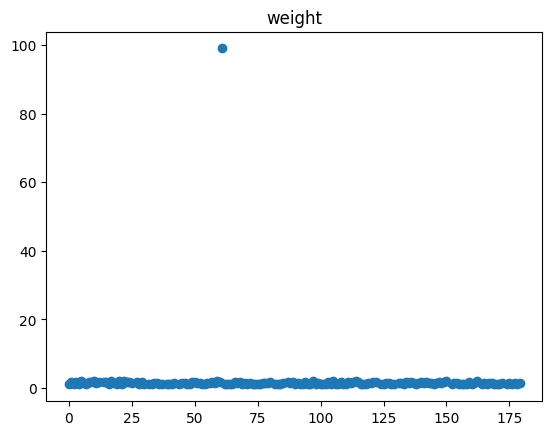

In [334]:
plt.scatter(db.index, db['weight'])
plt.title('weight')
plt.show()

Vemos que en el caso del peso, hay un dato atípico que se diferencia mucho del resto. Por lo que lo más sensato para tener un conjunto de datos más uniforme sería eliminarlo. Se trata de la fruta que pesa 99kg, lo cual claramente es un error a la hora de tomar los datos.

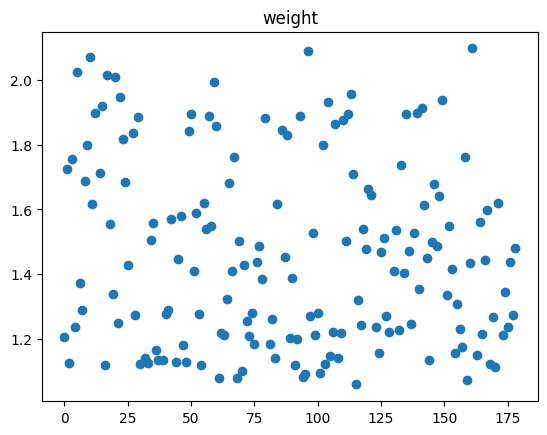

In [335]:
df = db[db['weight'] != db['weight'].max()]
df = df.reset_index(drop=True)
plt.scatter(df.index, df['weight'])
plt.title('weight')
plt.show()

Ahora realizamos el mismo procedimiento con el resto de columnas

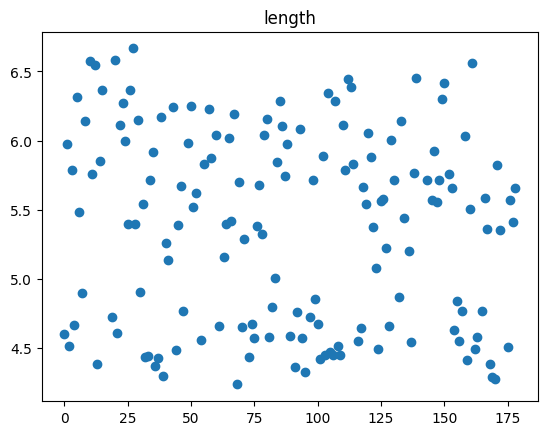

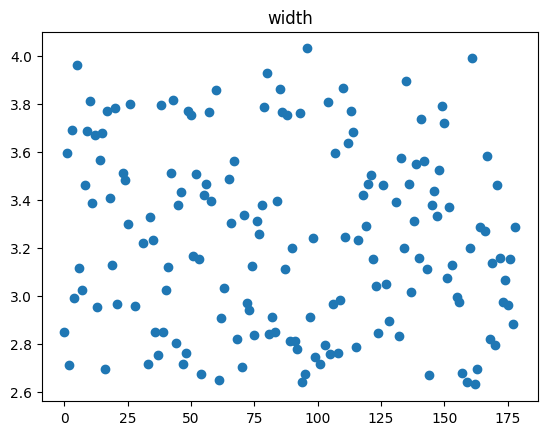

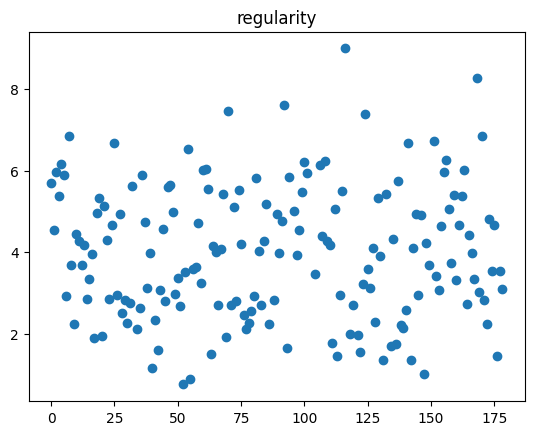

In [336]:
plt.scatter(df.index, df['length'])
plt.title('length')
plt.show()
plt.scatter(df.index, df['width'])
plt.title('width')
plt.show()
plt.scatter(df.index, df['regularity'])
plt.title('regularity')
plt.show()

Ahora que en ninguna de las columnas encontramos valores muy atípicos, procedemos a estimar los datos faltantes.

En primer lugar probamos a eliminar las filas en las que hay algun dato nulo.

In [337]:
df1 = df.dropna().reset_index(drop=True)
print(df1)
df1.describe()

     weight    length  width  regularity       cleft
0     1.205  4.603915  2.847    5.691634       Small
1     1.726  5.978000  3.594    4.539000       Large
2     1.126  4.516534  2.710    5.965993     Average
3     1.755  5.791000  3.690    5.366000       Large
4     1.238  4.666888  2.989    6.153947       Small
..      ...       ...    ...         ...         ...
116   1.620  5.826000  3.464    2.823000       Large
117   1.237  4.508595  2.960    4.655452       Small
118   1.437  5.569000  3.153    1.464000     Average
119   1.273  5.412000  2.882    3.533000  Very small
120   1.480  5.656000  3.288    3.112000     Average

[121 rows x 5 columns]


,weight,length,width,regularity
count,121.000000,121.000000,121.000000,121.000000
mean,1.461760,5.353520,3.231066,4.051832
std,0.279499,0.682332,0.362930,1.711822
min,1.074000,4.236811,2.641000,0.765100
25%,1.221000,4.658048,2.911000,2.704000
50%,1.433000,5.438000,3.242000,4.004000
75%,1.677000,5.877000,3.505000,5.415806
max,2.097000,6.581000,3.991000,8.986146


A continuación, trataremos de estimar los datos faltantes con Simple Imputer (empleando para ello la media, la mediana y el elemento más frecuente). De todos ellos, ya sabemos que el más robusto es la mediana, pues es menos influenciable por los elementos atípicos.

In [338]:
from sklearn.impute import SimpleImputer, KNNImputer

#Rellenando los valores nulos con la media
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df2 = pd.DataFrame(imp.fit_transform(df[df.columns[:-1]]))
df2.columns = df.columns[:-1]
df2['cleft'] = df['cleft']
print(df2)
df2.describe()

     weight    length  width  regularity       cleft
0     1.205  4.603915  2.847    5.691634       Small
1     1.726  5.978000  3.594    4.539000       Large
2     1.126  4.516534  2.710    5.965993     Average
3     1.755  5.791000  3.690    5.366000       Large
4     1.238  4.666888  2.989    6.153947       Small
..      ...       ...    ...         ...         ...
174   1.345  5.377312  3.065    3.531000  Very small
175   1.237  4.508595  2.960    4.655452       Small
176   1.437  5.569000  3.153    1.464000     Average
177   1.273  5.412000  2.882    3.533000  Very small
178   1.480  5.656000  3.288    3.112000     Average

[179 rows x 5 columns]


,weight,length,width,regularity
count,179.000000,179.000000,179.000000,179.000000
mean,1.462281,5.377312,3.242358,3.998793
std,0.275277,0.647600,0.359436,1.583399
min,1.059000,4.236811,2.630000,0.765100
25%,1.221500,4.726122,2.958000,2.812500
50%,1.449000,5.377312,3.242358,3.998793
75%,1.642500,5.863500,3.495500,5.080198
max,2.097000,6.666000,4.032000,8.986146


In [339]:
#Rellenando los valores nulos con la mediana
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df3 = pd.DataFrame(imp.fit_transform(df[df.columns[:-1]]))
df3.columns = df.columns[:-1]
df3['cleft'] = df['cleft']
print(df3)
df3.describe()

     weight    length  width  regularity       cleft
0     1.205  4.603915  2.847    5.691634       Small
1     1.726  5.978000  3.594    4.539000       Large
2     1.126  4.516534  2.710    5.965993     Average
3     1.755  5.791000  3.690    5.366000       Large
4     1.238  4.666888  2.989    6.153947       Small
..      ...       ...    ...         ...         ...
174   1.345  5.504000  3.065    3.531000  Very small
175   1.237  4.508595  2.960    4.655452       Small
176   1.437  5.569000  3.153    1.464000     Average
177   1.273  5.412000  2.882    3.533000  Very small
178   1.480  5.656000  3.288    3.112000     Average

[179 rows x 5 columns]


,weight,length,width,regularity
count,179.000000,179.000000,179.000000,179.000000
mean,1.460050,5.394298,3.241327,3.997463
std,0.275404,0.649045,0.359450,1.583408
min,1.059000,4.236811,2.630000,0.765100
25%,1.221500,4.726122,2.958000,2.812500
50%,1.429000,5.504000,3.231500,3.975000
75%,1.642500,5.863500,3.495500,5.080198
max,2.097000,6.666000,4.032000,8.986146


In [340]:
#Rellenando los valores nulos con el valor más frecuente
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df4 = pd.DataFrame(imp.fit_transform(df[df.columns[:-1]]))
df4.columns = df.columns[:-1]
df4['cleft'] = df['cleft']
print(df4)
df4.describe()

     weight    length  width  regularity       cleft
0     1.205  4.603915  2.847    5.691634       Small
1     1.726  5.978000  3.594    4.539000       Large
2     1.126  4.516534  2.710    5.965993     Average
3     1.755  5.791000  3.690    5.366000       Large
4     1.238  4.666888  2.989    6.153947       Small
..      ...       ...    ...         ...         ...
174   1.345  5.395000  3.065    3.531000  Very small
175   1.237  4.508595  2.960    4.655452       Small
176   1.437  5.569000  3.153    1.464000     Average
177   1.273  5.412000  2.882    3.533000  Very small
178   1.480  5.656000  3.288    3.112000     Average

[179 rows x 5 columns]


,weight,length,width,regularity
count,179.000000,179.000000,179.000000,179.000000
mean,1.439536,5.379683,3.188475,3.894335
std,0.288128,0.647628,0.396254,1.640911
min,1.059000,4.236811,2.630000,0.765100
25%,1.183500,4.726122,2.821000,2.613500
50%,1.403000,5.395000,3.155000,3.747000
75%,1.642500,5.863500,3.495500,5.080198
max,2.097000,6.666000,4.032000,8.986146


In [341]:
imp = KNNImputer(n_neighbors= 2)
df5 = pd.DataFrame(imp.fit_transform(df[df.columns[:-1]]))
df5.columns = df.columns[:-1]
df5['cleft'] = df['cleft']
print(df5)
df5.describe()

     weight    length  width  regularity       cleft
0     1.205  4.603915  2.847    5.691634       Small
1     1.726  5.978000  3.594    4.539000       Large
2     1.126  4.516534  2.710    5.965993     Average
3     1.755  5.791000  3.690    5.366000       Large
4     1.238  4.666888  2.989    6.153947       Small
..      ...       ...    ...         ...         ...
174   1.345  5.652000  3.065    3.531000  Very small
175   1.237  4.508595  2.960    4.655452       Small
176   1.437  5.569000  3.153    1.464000     Average
177   1.273  5.412000  2.882    3.533000  Very small
178   1.480  5.656000  3.288    3.112000     Average

[179 rows x 5 columns]


,weight,length,width,regularity
count,179.000000,179.000000,179.000000,179.000000
mean,1.473894,5.390063,3.247810,4.024169
std,0.289274,0.699509,0.377199,1.598814
min,1.059000,4.236811,2.630000,0.765100
25%,1.219000,4.647533,2.926000,2.800422
50%,1.437000,5.543000,3.232000,4.018000
75%,1.710000,5.985000,3.538500,5.146425
max,2.097000,6.666000,4.032000,8.986146


Consideramos que como las frutas tienden a parecerse (tiene sentido que las de mayor longitud tengan un mayor peso), finalmente, emplearemos el metodo de KNN Imputer para estimar los datos nulos, pues opinamos que es más preciso para resolver este problema.

In [342]:
df = df5.copy()
df.head()

,weight,length,width,regularity,cleft
0,1.205,4.603915,2.847,5.691634,Small
1,1.726,5.978000,3.594,4.539000,Large
2,1.126,4.516534,2.710,5.965993,Average
3,1.755,5.791000,3.690,5.366000,Large
4,1.238,4.666888,2.989,6.153947,Small


A continuación, tenemos que convertir la variable categórica cleft a dato numérico para que nuestros algoritmos puedan procesarlos correctamente. Podemos utilizar tanto el método del OrdinalEncoder como el OneHotEncoder pero, en este caso, el uso del OrdinalEncoder parece más adecuado. Esto es debido a que la categoría cleft tiene valores con cierto orden (de menor a mayor prominencia) y que el uso del OneHotEncoder crearía más columnas de categorías aumentando la complejidad de cómputo.

In [343]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=[['Very small', 'Small', 'Average', 'Large', 'Very large']])
df[['cleft']] = enc.fit_transform(df[['cleft']])
df.head()




,weight,length,width,regularity,cleft
0,1.205,4.603915,2.847,5.691634,1.0
1,1.726,5.978000,3.594,4.539000,3.0
2,1.126,4.516534,2.710,5.965993,2.0
3,1.755,5.791000,3.690,5.366000,3.0
4,1.238,4.666888,2.989,6.153947,1.0


Finalmente, tenemos que escalar los datos. Para ello, podemos emplear StandardScaler o MinMaxScaler. En este caso, emplearemos StandardScaler. Así, los datos pasan a tener media 0 y desviación típica 1.  

Para el resto del análisis hemos utilizado los conjuntos de datos con y sin escalado para comparar diferencias

In [344]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled.head()

,weight,length,width,regularity,cleft
0,-0.932156,-1.127009,-1.065576,1.045865,-0.701189
1,0.873959,0.842858,0.920365,0.322912,0.717036
2,-1.206020,-1.252277,-1.429798,1.217947,0.007923
3,0.974491,0.574778,1.175587,0.841621,0.717036
4,-0.817757,-1.036732,-0.688061,1.335835,-0.701189


# Clustering jerárquico

In [345]:
df.head()

,weight,length,width,regularity,cleft
0,1.205,4.603915,2.847,5.691634,1.0
1,1.726,5.978000,3.594,4.539000,3.0
2,1.126,4.516534,2.710,5.965993,2.0
3,1.755,5.791000,3.690,5.366000,3.0
4,1.238,4.666888,2.989,6.153947,1.0


Utilizamos una estrategia de clustering de abajo hacia arriba mediante el clustering aglomerativo.  

Dibujamos los dendrogramas con ayuda de una función proporcionada en uno de los Colabs utilizados durante la asignatura

In [346]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Realizamos el clustering utilizando distintas métricas y 'linkage' para analizar diferentes medidas de disimilaridad.

Utilizando distancias euclídeas:

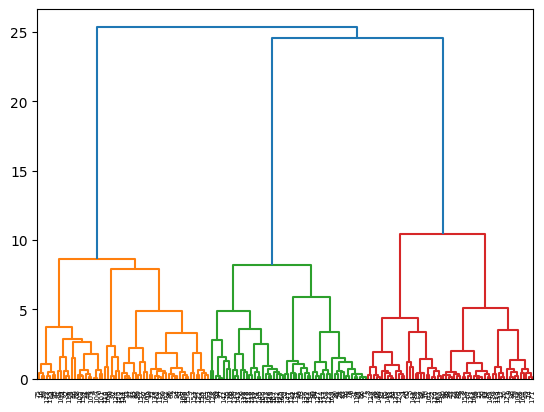

In [347]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(df)
plot_dendrogram(clustering)

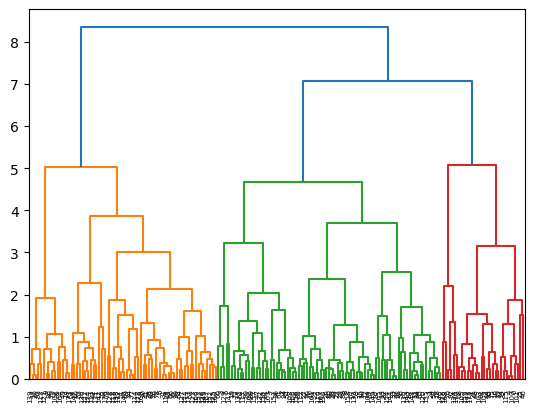

In [348]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete').fit(df)
plot_dendrogram(clustering)

Con 'linkage ward' y  'linkage complete' obtenemos lo que parecen ser tres grupos de clusters con cierta similitud. Veamos si esto se mantiene con diferentes condiciones

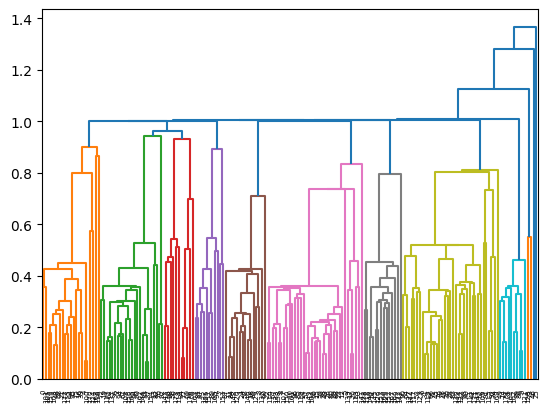

In [349]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single').fit(df)
plot_dendrogram(clustering)

Con 'linkage single' obtenemos un conjunto de clusters muy disimilares entre ellos, lo cual no es ideal para alcanzar un modelo adecuado.

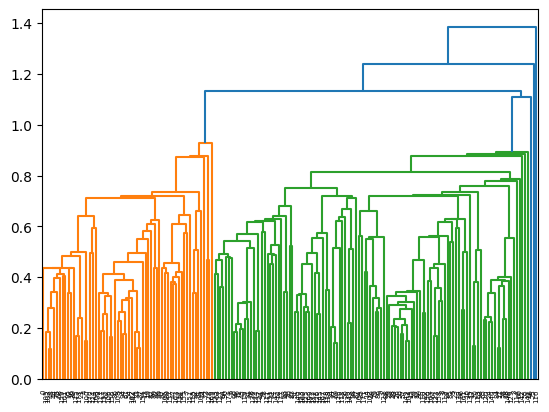

In [350]:
from sklearn.cluster import AgglomerativeClustering
clustering_scaled = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single').fit(df_scaled)
plot_dendrogram(clustering_scaled)

Con 'linkage single' utilizando el conjunto de datos escalado, obtenemos un resultado similar al anterior caso, sin embargo parecen grupos más compactos.

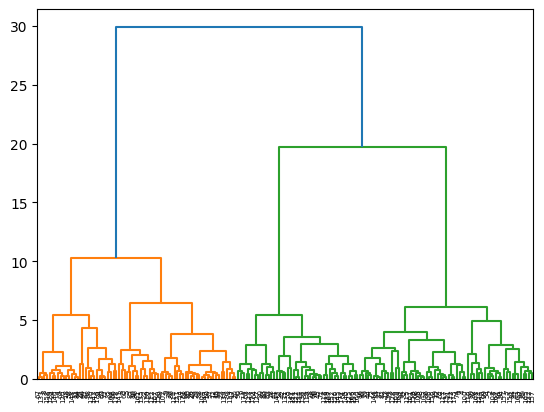

In [351]:
clustering_scaled = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward', metric="euclidean").fit(df_scaled)
plot_dendrogram(clustering_scaled)

Con 'ward linkage' Volvemos a ver una diferenciación en 3 o 4 grupos sobre los datos escalados.

Ahora utilizamos distancias de manhattan

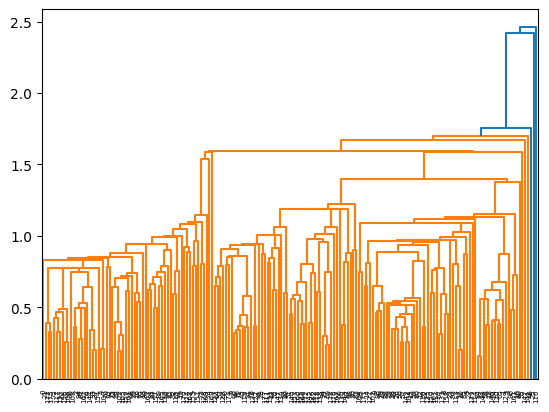

In [352]:
clustering_scaled = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single', metric="manhattan").fit(df_scaled)
plot_dendrogram(clustering_scaled)

Con 'linkage single' volvemos a tener muy poca información

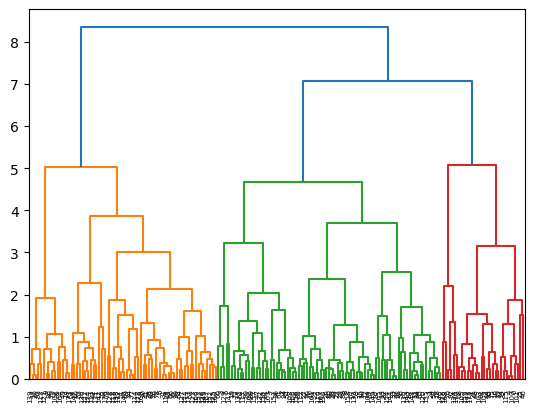

In [353]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete').fit(df)
plot_dendrogram(clustering)

Sin embargo, al utilizar un linkage completo, volvemos a poder diferenciar tres grupos

Como conclusión en este apartado, podemos decir que para este caso un clustering con 3 clusters sería ideal

# Clustering particional

In [354]:
df.head()

,weight,length,width,regularity,cleft
0,1.205,4.603915,2.847,5.691634,1.0
1,1.726,5.978000,3.594,4.539000,3.0
2,1.126,4.516534,2.710,5.965993,2.0
3,1.755,5.791000,3.690,5.366000,3.0
4,1.238,4.666888,2.989,6.153947,1.0


Vamos a empezar realizando el clustering mediante Kmeans con 5 y 10 clusters sobre los datos no escalados y escalados para observar diferencias

In [355]:
from sklearn.cluster import KMeans

kmeans10 = KMeans(n_clusters= 10, n_init= 3, random_state=0)
kmeans10.fit(df)
kmeans5 = KMeans(n_clusters= 5, n_init= 3, random_state=0)
kmeans5.fit(df)
kmeans5.labels_

array([3, 0, 4, 0, 4, 0, 2, 4, 1, 1, 0, 0, 1, 3, 1, 1, 3, 1, 0, 4, 1, 3,
       0, 1, 0, 4, 1, 0, 2, 1, 2, 2, 3, 3, 2, 1, 4, 3, 1, 3, 2, 2, 2, 1,
       3, 2, 3, 4, 3, 1, 1, 2, 2, 2, 4, 2, 0, 1, 0, 1, 0, 4, 4, 2, 3, 0,
       2, 0, 3, 2, 4, 2, 3, 2, 3, 3, 2, 2, 2, 1, 1, 4, 3, 2, 0, 0, 1, 0,
       1, 0, 3, 3, 4, 1, 4, 3, 0, 0, 0, 4, 4, 4, 1, 3, 1, 3, 4, 0, 4, 3,
       0, 2, 0, 1, 2, 3, 4, 4, 2, 2, 0, 1, 2, 2, 4, 2, 2, 3, 2, 0, 0, 2,
       4, 1, 2, 0, 2, 4, 2, 1, 2, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 4, 2, 2,
       3, 4, 4, 0, 1, 3, 2, 0, 4, 4, 1, 0, 3, 2, 4, 2, 4, 1, 2, 3, 2, 3,
       2, 2, 2])

In [356]:
kmeans5_scaled = KMeans(n_clusters= 5, n_init= 3, random_state=0)
kmeans5_scaled.fit(df_scaled)
kmeans10_scaled = KMeans(n_clusters= 10, n_init= 3, random_state=0)
kmeans10_scaled.fit(df_scaled)
kmeans5_scaled.labels_

array([1, 0, 4, 0, 4, 2, 3, 4, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 4, 2, 1,
       2, 2, 0, 4, 2, 2, 3, 2, 3, 3, 1, 1, 3, 0, 4, 1, 2, 1, 3, 3, 3, 2,
       1, 3, 0, 4, 1, 2, 2, 3, 3, 3, 4, 3, 0, 2, 0, 2, 2, 4, 4, 3, 3, 0,
       3, 2, 1, 3, 4, 3, 4, 1, 1, 1, 3, 3, 3, 2, 2, 4, 1, 3, 0, 2, 2, 0,
       2, 4, 3, 1, 4, 2, 4, 1, 2, 4, 0, 4, 4, 1, 2, 1, 2, 1, 4, 2, 4, 1,
       2, 3, 2, 2, 0, 1, 4, 4, 3, 3, 0, 0, 3, 3, 4, 3, 3, 3, 1, 0, 0, 3,
       4, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 0, 1, 3, 0, 3, 0, 2, 2, 4, 3, 3,
       1, 4, 4, 4, 2, 1, 3, 2, 4, 4, 0, 4, 3, 3, 4, 1, 4, 0, 3, 1, 3, 1,
       3, 3, 0])

In [357]:
from sklearn import metrics
print('Silhouette score')
print('with no scale, n_clusters= 5:', metrics.silhouette_score(df,kmeans5.labels_,metric='euclidean'))
print('with scale, n_clusters= 5:', metrics.silhouette_score(df_scaled,kmeans5_scaled.labels_,metric='euclidean'))
print('with no scale, n_clusters= 10:', metrics.silhouette_score(df,kmeans10.labels_,metric='euclidean'))
print('with scale, n_clusters= 10:', metrics.silhouette_score(df_scaled,kmeans10_scaled.labels_,metric='euclidean'))

Silhouette score
with no scale, n_clusters= 5: 0.35992393455764066
with scale, n_clusters= 5: 0.3206976282937911
with no scale, n_clusters= 10: 0.3367286979751991
with scale, n_clusters= 10: 0.29176491071381555


Podemos ver gracias al silhouette score, que obtenemos valores no muy elevados y que escalar los datos empeora ligeramente el resultado

In [358]:
samples = metrics.silhouette_samples(df,kmeans5.labels_,metric='euclidean')
i = np.where(samples < 0.3)
samples[samples < 0.3]

array([ 0.12845195,  0.12549786,  0.27437214,  0.19526913,  0.05881287,
        0.1585301 ,  0.01296564,  0.23450276,  0.14215212,  0.25239121,
        0.10523384,  0.25774806,  0.14659671,  0.13030523,  0.07370353,
        0.2559475 ,  0.23033138,  0.19307134,  0.21468488, -0.01313025,
        0.29477472,  0.15903268,  0.0570491 ,  0.12067314,  0.15562176,
        0.26576798,  0.24455149, -0.01738416,  0.02680517,  0.17200492,
        0.10532744,  0.18023403,  0.14966942, -0.00626458,  0.21649499,
        0.07645496, -0.02764594,  0.29455769,  0.2736773 ,  0.2818082 ,
        0.11814845,  0.21065692,  0.24983277,  0.08963552,  0.12161887,
        0.1374365 ,  0.19357041,  0.0873337 ,  0.15846722,  0.242632  ,
        0.2979233 ,  0.26162301,  0.28649366,  0.29708711, -0.04024908,
        0.23199911,  0.26688601,  0.27366583,  0.0924862 ,  0.18817012,
        0.11715888,  0.25604475,  0.18537554,  0.20238937,  0.19081137,
        0.14689818,  0.06249145])

In [359]:
samples_scaled = metrics.silhouette_samples(df_scaled,kmeans5_scaled.labels_,metric='euclidean')
i_scaled = np.where(samples_scaled < 0.3)
samples_scaled[samples_scaled < 0.3]

array([ 0.16887727,  0.24809327,  0.20183518,  0.14577254,  0.0208627 ,
       -0.02058772,  0.21337799,  0.27774831,  0.15582497,  0.10764536,
        0.29496135,  0.03298551,  0.12458617,  0.19385621,  0.03947155,
        0.18150723,  0.21020926,  0.21257431,  0.26775855,  0.2989407 ,
        0.28485261,  0.08236041,  0.09525105,  0.19668623,  0.14983064,
        0.25607833,  0.21239998,  0.10640978,  0.00898243,  0.20891841,
        0.09189961,  0.19675041, -0.00324891,  0.29370955,  0.17631816,
        0.13618559, -0.02590759,  0.14739215,  0.04870423,  0.15351494,
        0.15325337,  0.27519622,  0.27865742,  0.21199968,  0.19951169,
        0.20154381,  0.15624119,  0.17821243,  0.19049085,  0.25446851,
        0.22964375,  0.07913718,  0.15959518,  0.27459422,  0.19411339,
        0.1867956 ,  0.21059552,  0.15759218,  0.19063265,  0.2326076 ,
        0.14930603,  0.28429316,  0.13029095,  0.17164784,  0.19619962,
        0.06318235, -0.03538953,  0.07596903,  0.16272839,  0.08

Podemos ver que usando datos escalados obtenemos más valores bajos de silhouette.

De todas formas, el número de clusters elegidos no parece ser adecuado. Teniendo esto en cuenta, vamos a analizar el silhouette coeficient de distintos clusterings mediante Kmeans empleando de 2 a 15 clusters

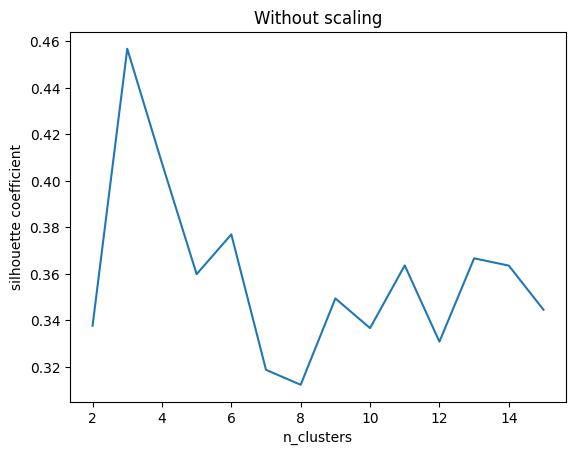

In [360]:
x = list(range(2,16))
y = x.copy()
for i in range(len(x)):
    y[i] = metrics.silhouette_score(df,KMeans(n_clusters= x[i], n_init= 3, random_state=0).fit(df).labels_,metric='euclidean')
plt.plot(x,y)
plt.title('Without scaling')
plt.xlabel('n_clusters')
plt.ylabel('silhouette coefficient')
plt.show()

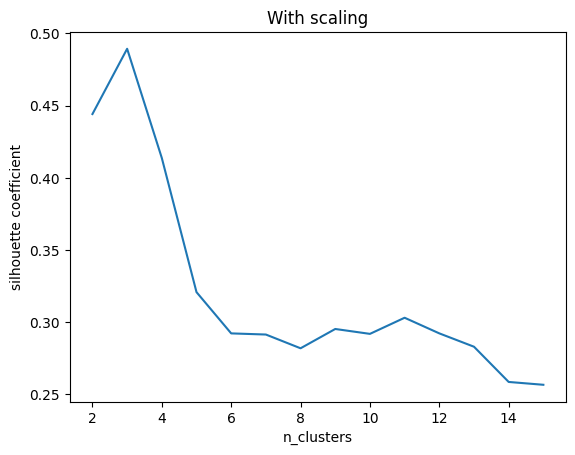

In [361]:
x = list(range(2,16))
y = x.copy()
for i in range(len(x)):
    y[i] = metrics.silhouette_score(df_scaled,KMeans(n_clusters= x[i], n_init= 3, random_state=0).fit(df_scaled).labels_,metric='euclidean')
plt.plot(x,y)
plt.title('With scaling')
plt.xlabel('n_clusters')
plt.ylabel('silhouette coefficient')
plt.show()

Tanto con como sin escalado, el pico se alcanza en n_clusters=3. Esto confirma las conclusiones obtenidas tras realizar el clustering jerárquico.

Vamos a analizar más detenidamente este KMeans con 3 clusters.

In [362]:
kmeans3 = KMeans(n_clusters= 3, n_init= 3, random_state=0)
kmeans3.fit(df)

kmeans3_scaled = KMeans(n_clusters= 3, n_init= 3, random_state=0)
kmeans3_scaled.fit(df_scaled)

KMeans(n_clusters=3, n_init=3, random_state=0)

In [363]:
kmeans3_scaled.labels_

array([1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 2,
       1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2,
       0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 0,
       2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0,
       1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1,
       0, 0, 0])

In [364]:
print('with no scale, n_clusters= 3:', metrics.silhouette_score(df,kmeans3.labels_,metric='euclidean'))
print('with scale, n_clusters= 3:', metrics.silhouette_score(df_scaled,kmeans3_scaled.labels_,metric='euclidean'))

with no scale, n_clusters= 3: 0.4568315719140889
with scale, n_clusters= 3: 0.4894016857544144


Utilizando 3 clusters, en este caso al escalar los datos obtenemos un mejor resultado

## Visualización del clustering final

Realizamos una serie de plots con el conjunto de datos siguiendo las etiquetas que nos ha aportado este clustering

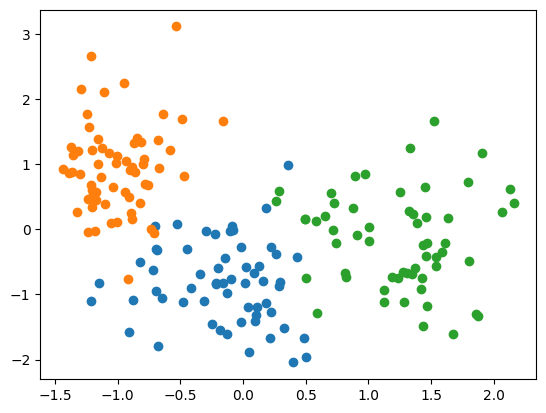

In [365]:
plt.scatter(df_scaled[kmeans3_scaled.labels_ == 0]['weight'], df_scaled[kmeans3_scaled.labels_ == 0]['regularity'])
plt.scatter(df_scaled[kmeans3_scaled.labels_ == 1]['weight'], df_scaled[kmeans3_scaled.labels_ == 1]['regularity'])
plt.scatter(df_scaled[kmeans3_scaled.labels_ == 2]['weight'], df_scaled[kmeans3_scaled.labels_ == 2]['regularity'])
plt.show()

Observando el peso frente a la regularidad de la fruta, podemos ver que nuestra separación en 3 clusters parece adecuada.

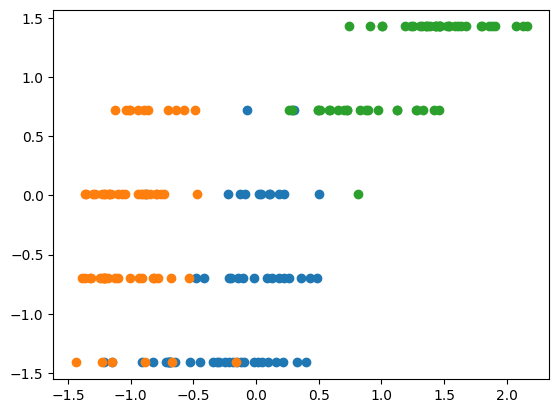

In [366]:
plt.scatter(df_scaled[kmeans3_scaled.labels_ == 0]['weight'], df_scaled[kmeans3_scaled.labels_ == 0]['cleft'])
plt.scatter(df_scaled[kmeans3_scaled.labels_ == 1]['weight'], df_scaled[kmeans3_scaled.labels_ == 1]['cleft'])
plt.scatter(df_scaled[kmeans3_scaled.labels_ == 2]['weight'], df_scaled[kmeans3_scaled.labels_ == 2]['cleft'])
plt.show()

Viendo el peso esta vez frente al 'cleft', siguiendo nuestra separación en 3 clusters podemos diferenciar un grupo con bajo peso y un rango amplio de 'cleft', otro grupo con peso un poco mayor y 'cleft' en un rango amplio y un tercer grupo con peso y 'cleft' elevados.

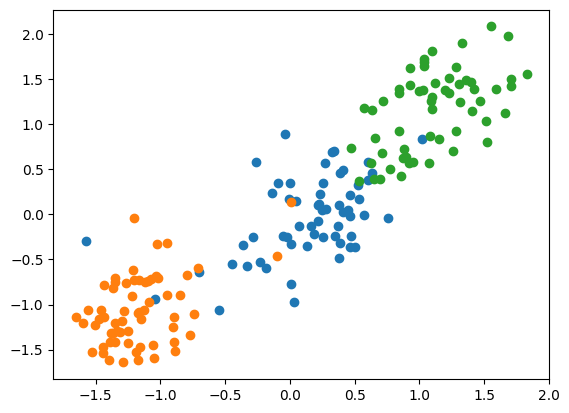

In [367]:
plt.scatter(df_scaled[kmeans3_scaled.labels_ == 0]['length'], df_scaled[kmeans3_scaled.labels_ == 0]['width'])
plt.scatter(df_scaled[kmeans3_scaled.labels_ == 1]['length'], df_scaled[kmeans3_scaled.labels_ == 1]['width'])
plt.scatter(df_scaled[kmeans3_scaled.labels_ == 2]['length'], df_scaled[kmeans3_scaled.labels_ == 2]['width'])
plt.show()

Observando longitud frente a anchura, si bien algun punto aparece alejado de otros de su mismo color, los clusters parecen diferenciados.

### PCA plot

Para observar mejor nuestro resultado, realizamos un análisis de componentes principales mediante la herramienta PCA de sklearn para transformar nuestro conjunto de datos a uno con dos dimensiones.

In [368]:
from sklearn.decomposition import PCA

pca = PCA(2)
df_scaled_2d = pca.fit_transform(df_scaled)
df_scaled_2d.shape

(179, 2)

Realizamos el clustering a nuestro nuevo conjunto de datos.

In [369]:
kmeans3_scaled_2d = KMeans(n_clusters= 3, n_init= 3, random_state=0)
kmeans3_scaled_2d.fit(df_scaled_2d)

KMeans(n_clusters=3, n_init=3, random_state=0)

Observamos el resultado.

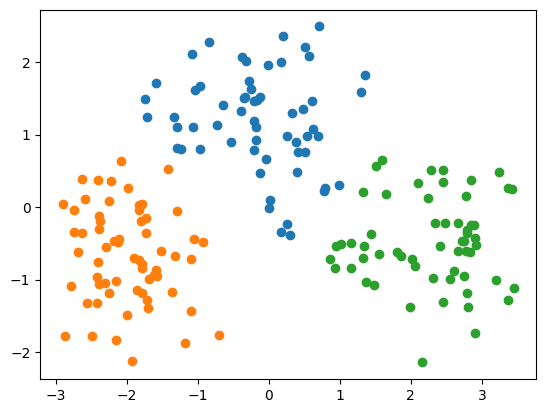

In [370]:
plt.scatter(df_scaled_2d[kmeans3_scaled_2d.labels_ == 0][:,0], df_scaled_2d[kmeans3_scaled_2d.labels_ == 0][:,1])
plt.scatter(df_scaled_2d[kmeans3_scaled_2d.labels_ == 1][:,0], df_scaled_2d[kmeans3_scaled_2d.labels_ == 1][:,1])
plt.scatter(df_scaled_2d[kmeans3_scaled_2d.labels_ == 2][:,0], df_scaled_2d[kmeans3_scaled_2d.labels_ == 2][:,1])
plt.show()

Como podemos ver, se pueden diferenciar 3 grandes clusters de frutas por lo que nuestra elección parece correcta.

Vamos a concretar con lo observado anteriormente las características de cada cluster:

- Primero: peso bajo, regular, 'cleft' dispar, longitud y anchura bajas.
- Segundo: peso bajo-medio, irregular, baja prominencia de 'cleft', longitud y anchura medias.
- Tercero: peso elevado, regularidad inestable, alta prominencia de 'cleft', longitud y anchura elevadas.